In [1]:
import os
import glob

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

import umap
import sys
sys.path.append('../custom_function')
import clustering # custom function

random_seed = 2022
klist = [3,4,5,6,7]

# Import data

In [2]:
input_dir = '../output_data/group/category/'
# all 59 participants
dissim_ctg_avg_159r_all = pd.read_csv(input_dir + 'dissim_ctg_avg_159rel_all_59p.csv',index_col=0)
dissim_mla_avg_159r_all = pd.read_csv(input_dir + 'dissim_mla_avg_159rel_all_59p.csv',index_col=0)

We use UMAP as a dimensionality reduction technique that generalizes to nonlinearities, and KMeans to clustering analysis

# Explicit task(M2)

## UMAP+KMeans

In [3]:
umap_exp_159r_all = umap.UMAP(n_neighbors=15, min_dist=0.01, n_components=2,
                      metric = 'precomputed',
                      random_state=random_seed).fit_transform(dissim_ctg_avg_159r_all)

umap_exp_159r_all = pd.DataFrame(umap_exp_159r_all, columns=['Dim1','Dim2'], index=dissim_ctg_avg_159r_all.index)

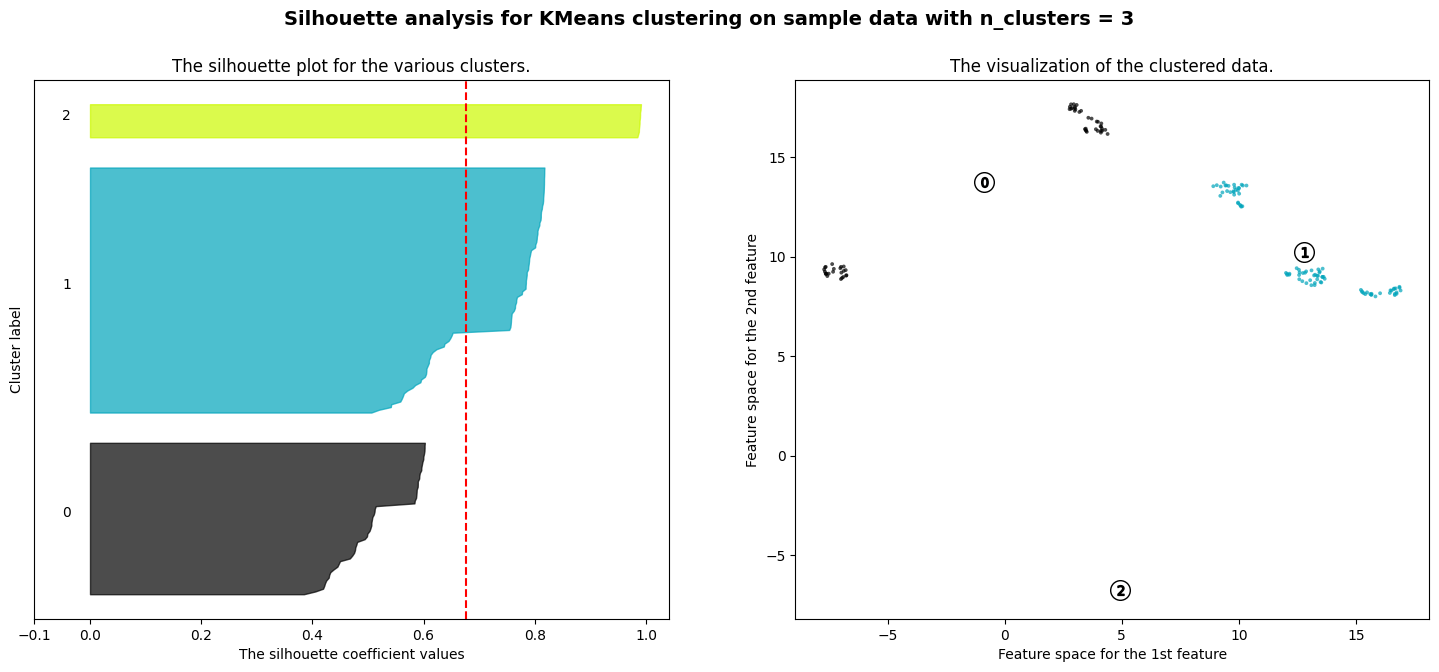

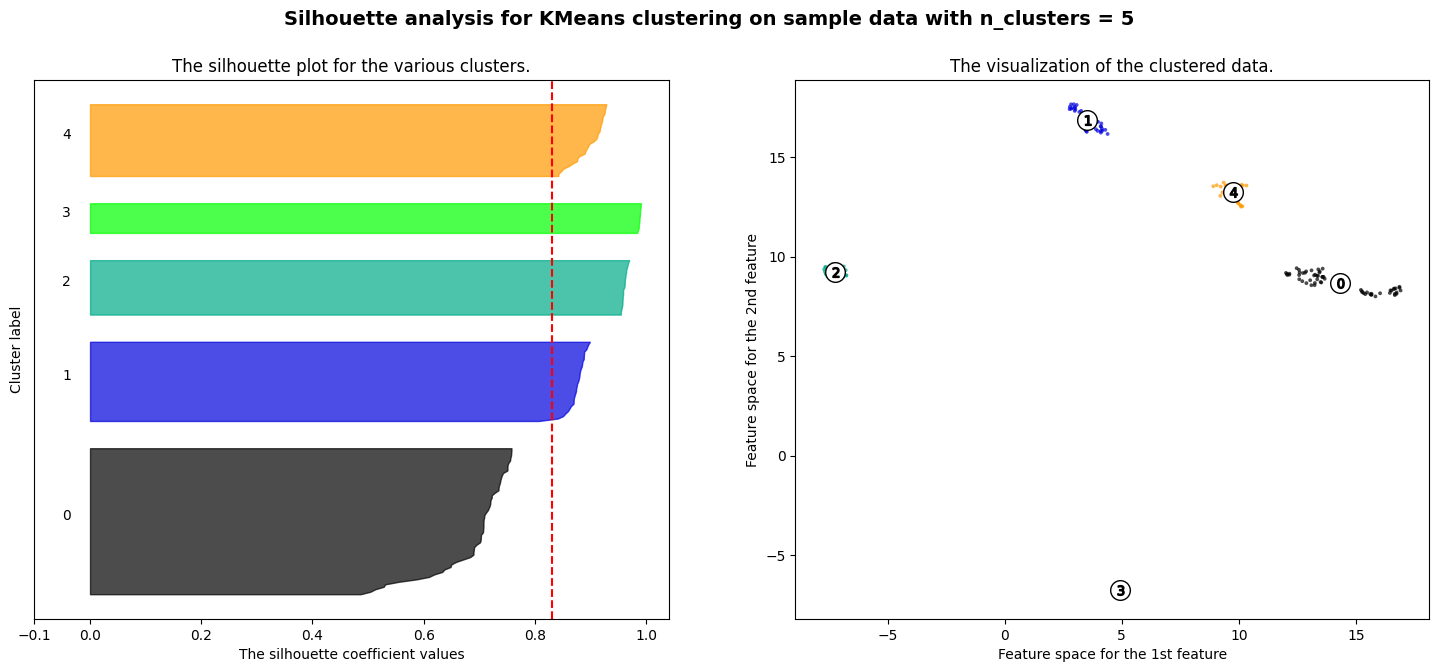

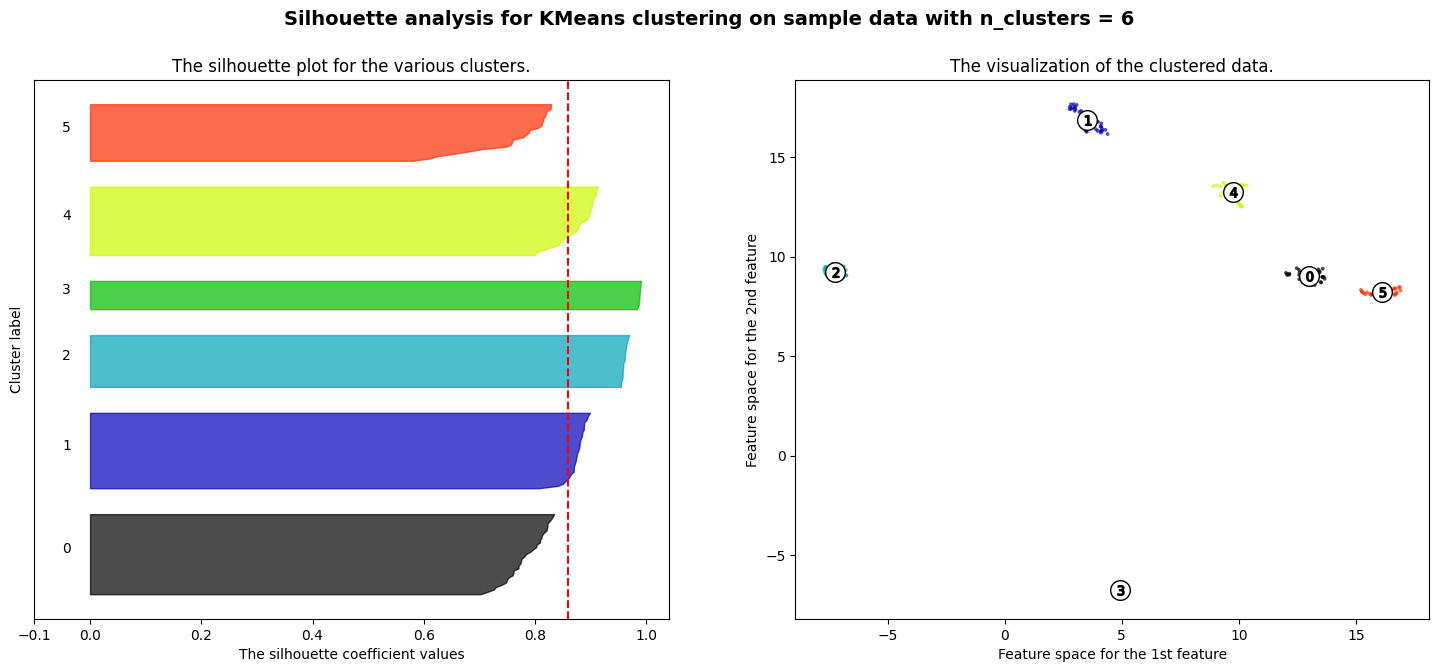

In [4]:
clustering.silhouette_cluster(umap_exp_159r_all, *[3,5,6])

In [5]:
# 7 clusters doesn't result in another meaningful cluster
# umap_exp_results_159r_all = clustering.create_cluster_models(data_type = "df",data =umap_exp_159r_all,
#                                                   methods= ['KMeans', 'Hierarchical'],ks=  klist, keep_orig=True)

# clustering.cluster_results(umap_exp_results_159r_all,method_number='cl_k7')

In [6]:
umap_exp_results_159r_all = clustering.create_cluster_models(data_type = "df",data =umap_exp_159r_all,
                                                  methods= ['KMeans', 'Hierarchical'],ks=  klist, keep_orig=True)

clustering.cluster_results(umap_exp_results_159r_all,method_number='cl_k6')


Cluster 1 Relationship:35
student and dorm resident assistant, union leader and union member, intern and employee, mentor and mentee, religious leader and congregant, teacher and student, employer and employee, supervisor and subordinate, team captain and team members, predecessor and successor, interviewer and job applicant, officer and soldier, a monarch and their minister, professor and graduate student, director and performer, athletic trainer and trainee, doctor and nurse, landlord and housekeeper, foreman and laborer, superior and subordinate, club member and club president, chief and deputy, athlete and referee, principal and teacher, judge and lawyer, coach and athlete, university student and administrator, leader and follower, man and god, volunteer and organizer, manager and staff, owner and manager, manager and assistant, boss and secretary, professor and teaching assistant

Cluster 2 Relationship:33
a person and their social media follower, alumni, childhood friends, peers

Cluster1: Power(35)  
Cluster2: Affiliation(33)   
Cluster3: Familial(23)    
Cluster4: Romantic(13)   
Cluster5: Transactional(30)  
Cluster6: Hostile(25)  

<table><tr><td bgcolor="green"><font size=5>output</font></td></tr></table>

In [7]:
umap_exp_results_159r_all.to_csv('../output_data/group/category/cluster_results/umap_exp_results_159r_all.csv')

## Heatmap

In [8]:
umap_exp_results_159r_all = pd.read_csv('../output_data/group/category/cluster_results/umap_exp_results_159r_all.csv',
                                       index_col=0)
rels_c6_df = pd.DataFrame(umap_exp_results_159r_all['cl_k6'])
rels_c6_df[rels_c6_df['cl_k6'] == 5] = -6 #Hostile
rels_c6_df[rels_c6_df['cl_k6'] == 3] = -5 #Romantic
rels_c6_df[rels_c6_df['cl_k6'] == 2] = -4 #Familial
rels_c6_df[rels_c6_df['cl_k6'] == 1] = -3 #Affiliative
rels_c6_df[rels_c6_df['cl_k6'] == 4] = -2 #Transactional
rels_c6_df[rels_c6_df['cl_k6'] == 0] = -1 #Power

rels_c6_df = rels_c6_df.sort_values(by='cl_k6')
rels_c6 = list(rels_c6_df.index)
umap_exp_results_159r_all_order = umap_exp_results_159r_all.loc[rels_c6,:]

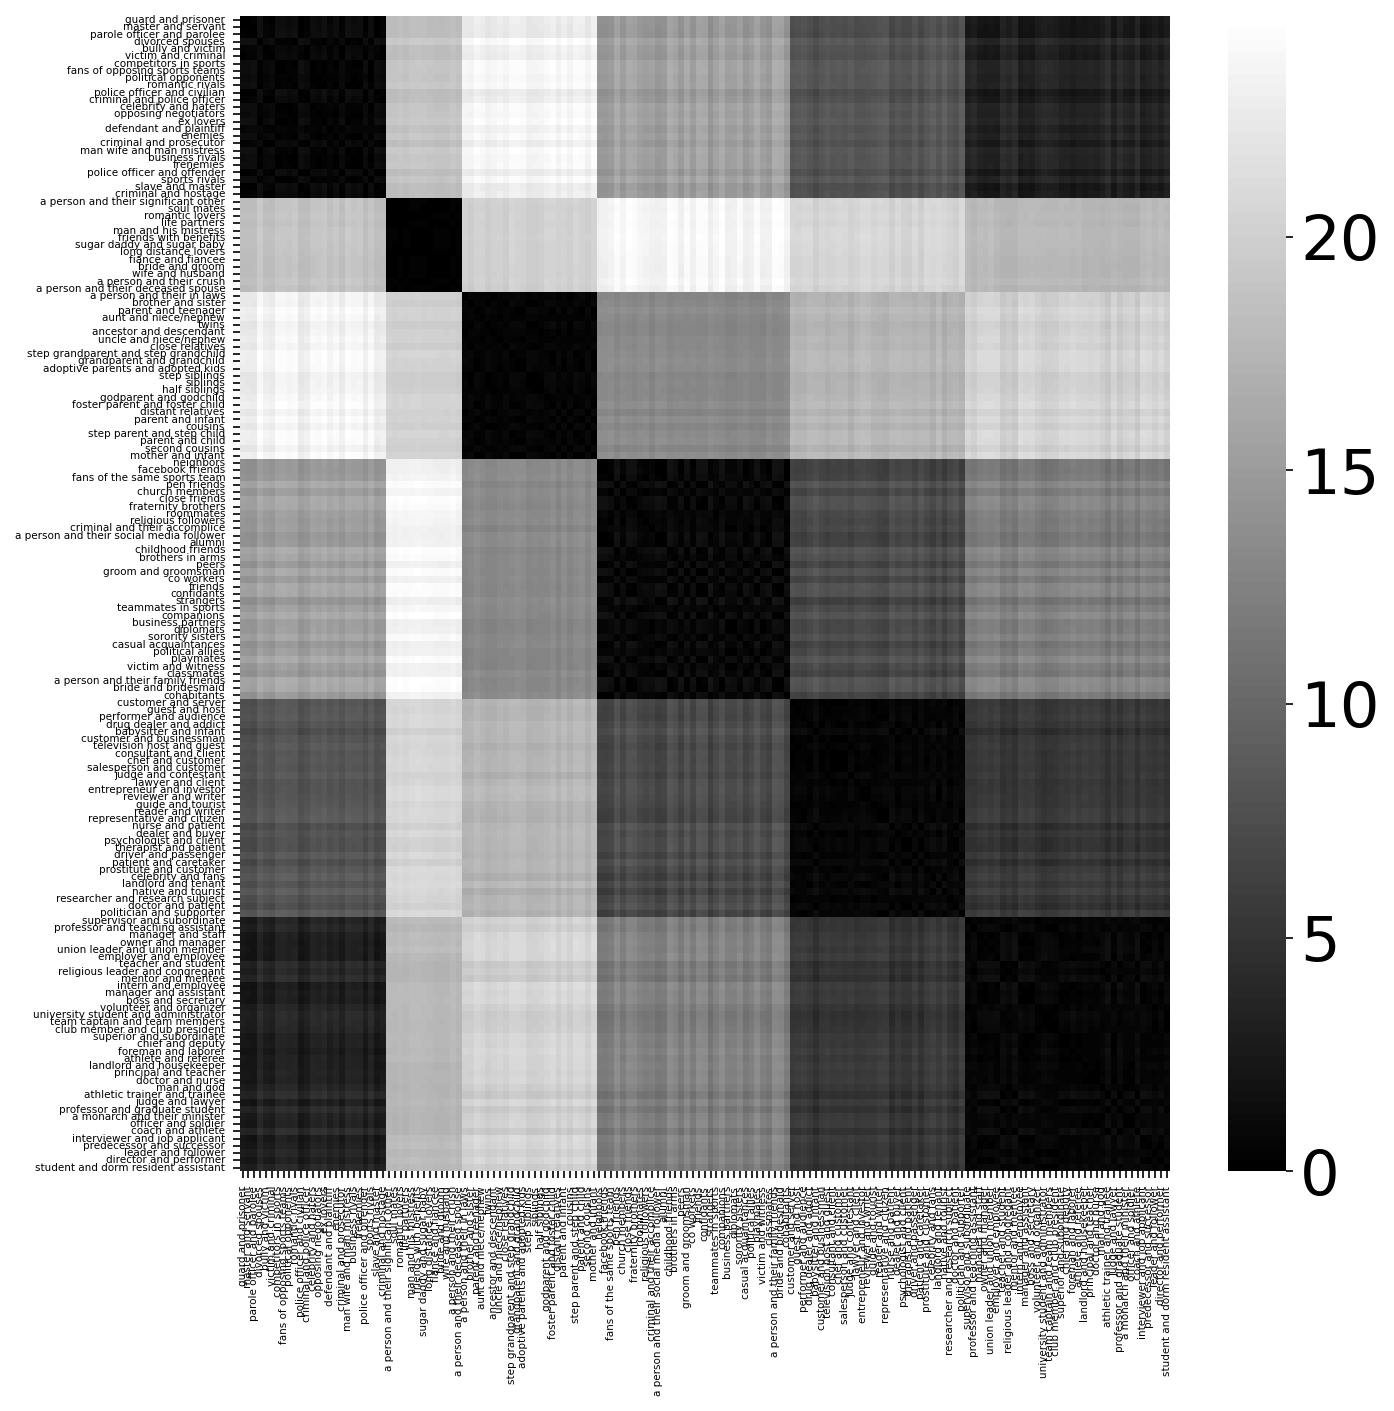

In [9]:
plt.figure(figsize=(10,10),dpi=150)
# plt.title('RDM of Explicit task (59 participants and 159 relationships)')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)

dissim_umap_rdm = euclidean_distances(umap_exp_results_159r_all_order[['Dim1','Dim2']])
ax = sns.heatmap(dissim_umap_rdm,xticklabels=rels_c6,yticklabels=rels_c6,
            cmap = cmaps)
cbar=ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

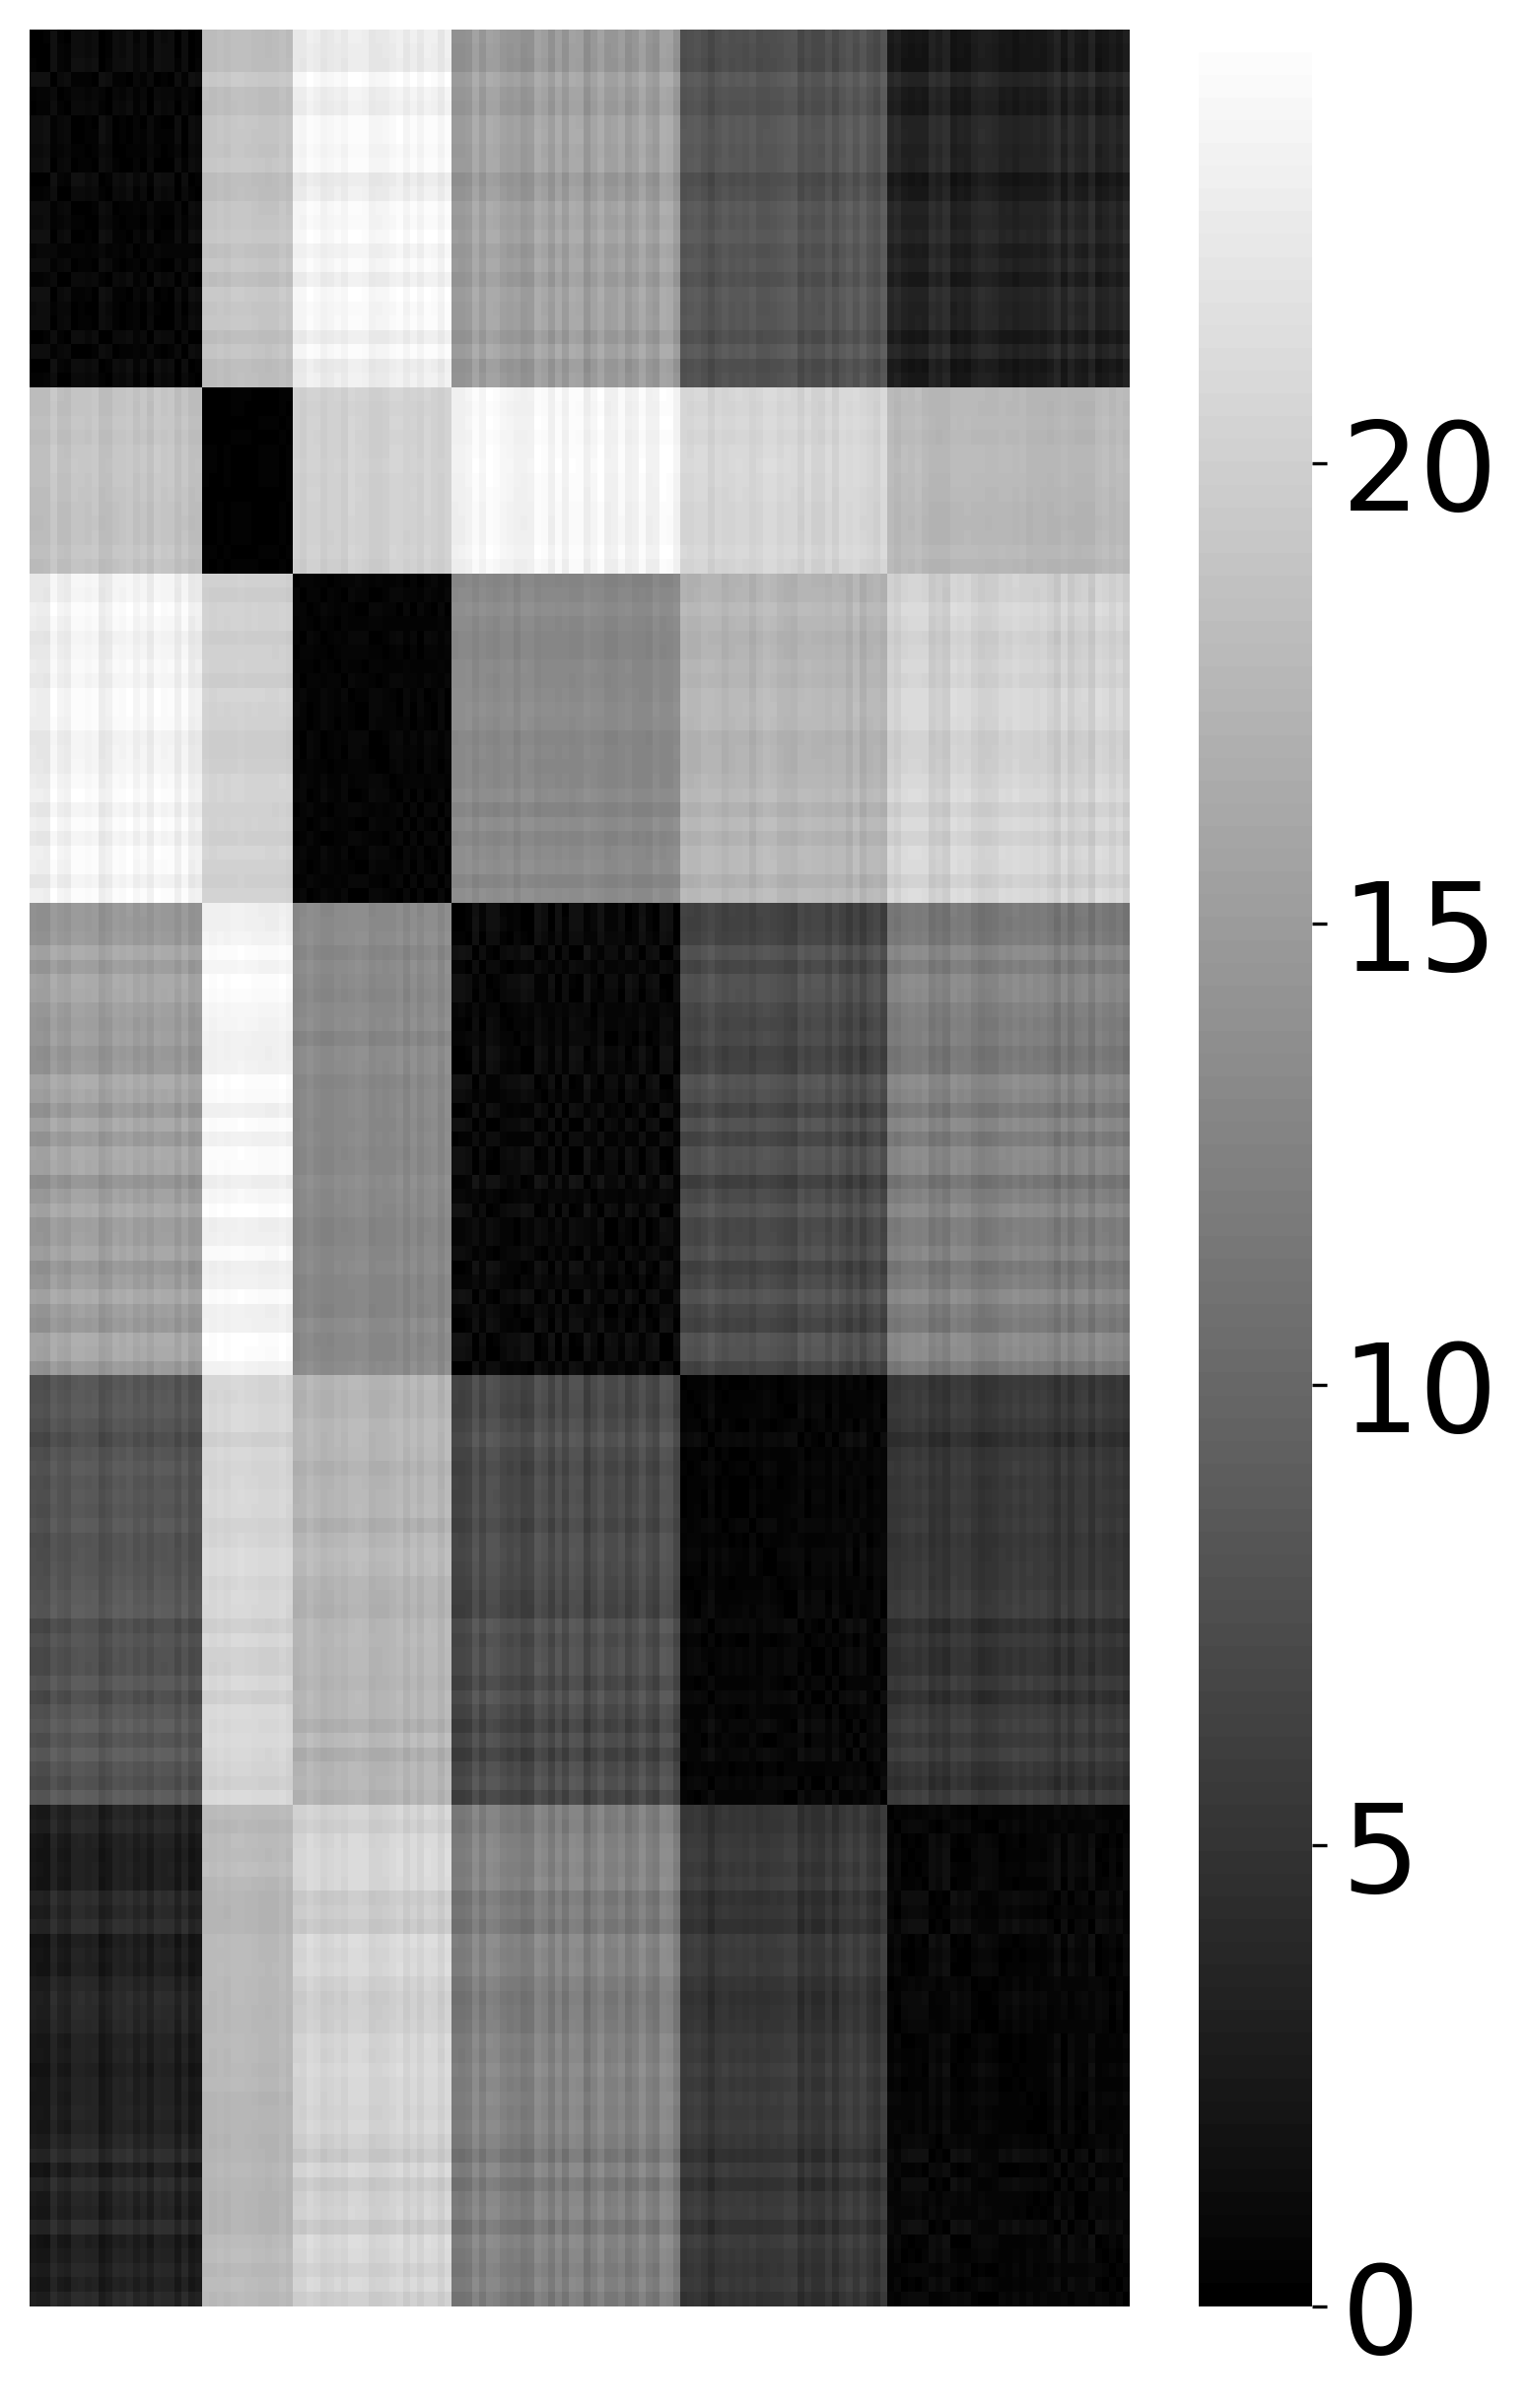

In [10]:
plt.figure(figsize=(6,10),dpi=300)
# plt.title('RDM of Explicit task (59 participants and 159 relationships)')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)

dissim_umap_rdm = euclidean_distances(umap_exp_results_159r_all_order[['Dim1','Dim2']])
ax = sns.heatmap(dissim_umap_rdm,xticklabels='',yticklabels='',
            cmap = cmaps,cbar=True)
cbar=ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

# Implicit task(M1)

## UMAP+KMeans

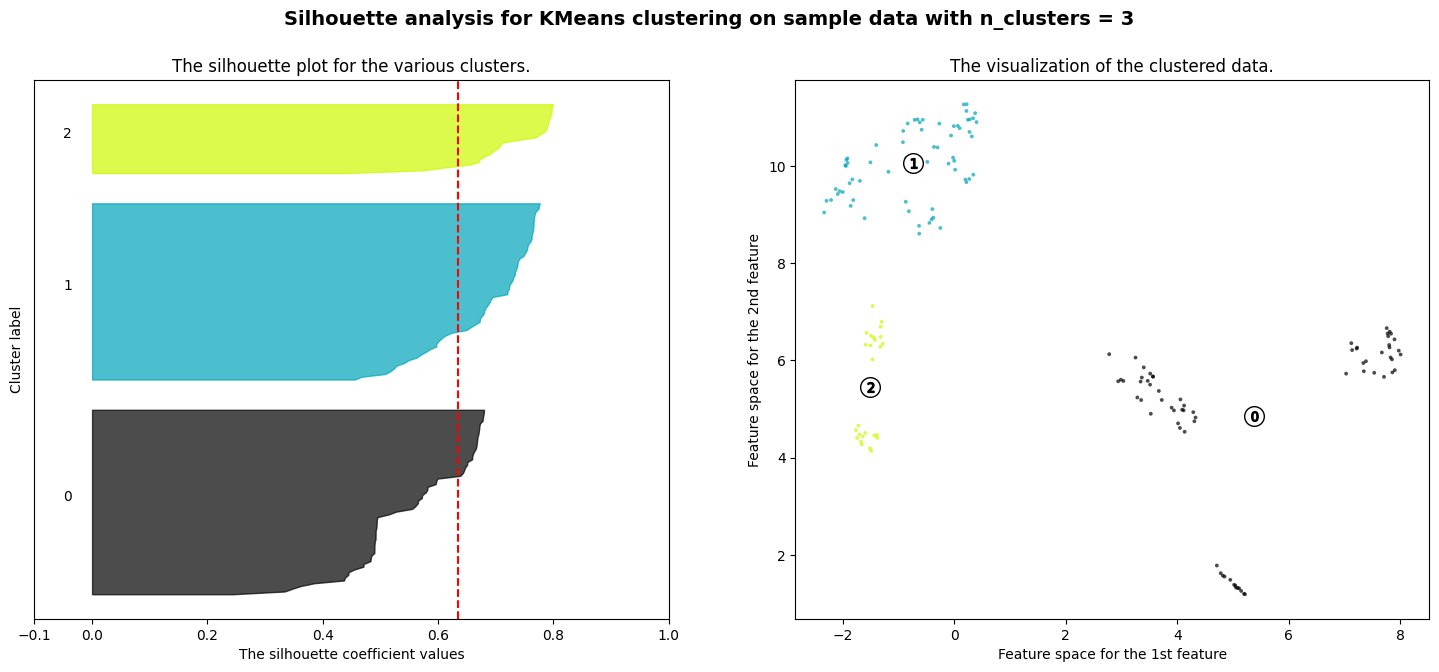

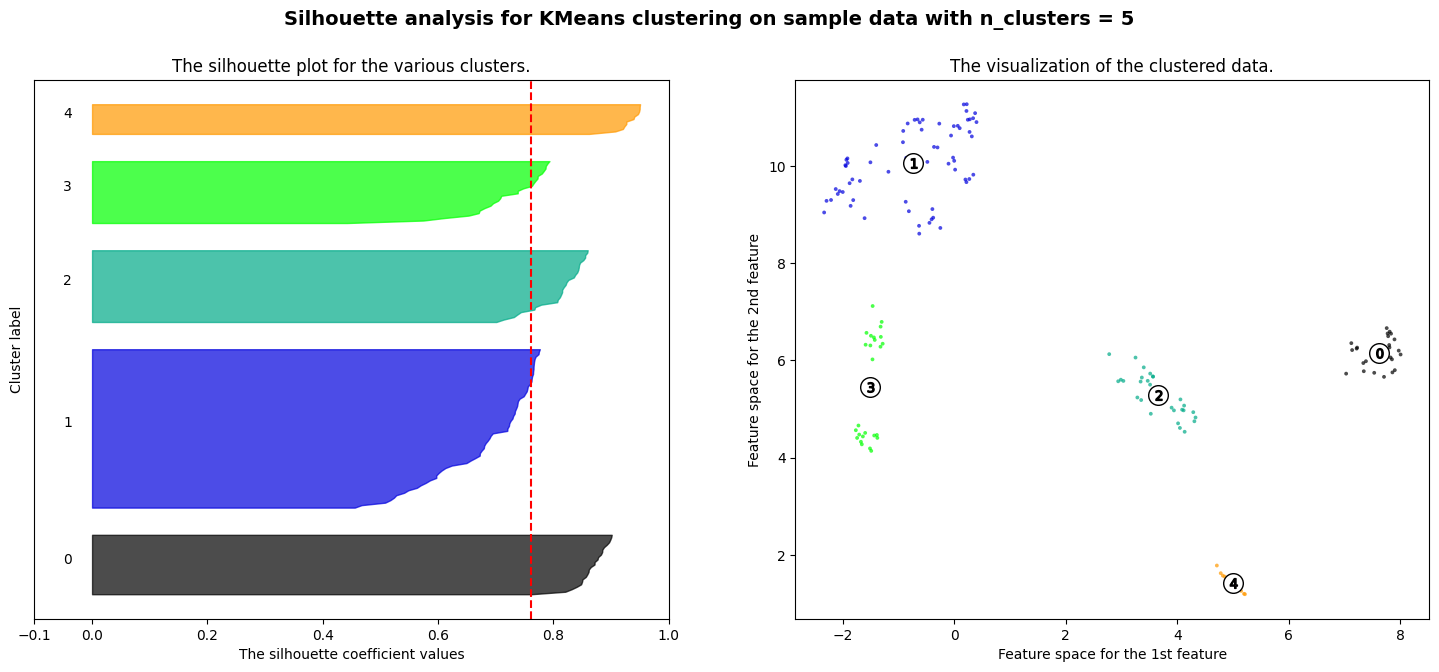

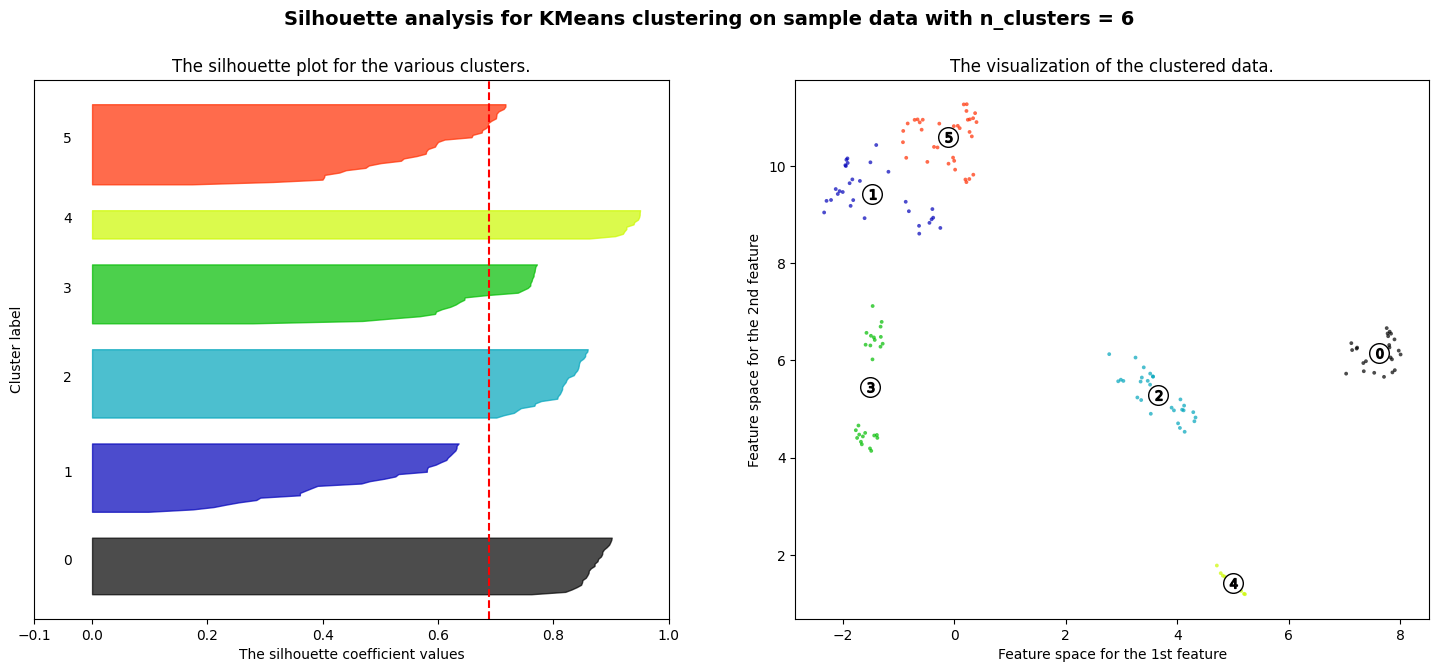

In [11]:
umap_imp_159r_all = umap.UMAP(n_neighbors=15, min_dist=0.01, n_components=2,
                              metric = 'precomputed',
                      random_state=random_seed).fit_transform(dissim_mla_avg_159r_all)
umap_imp_159r_all = pd.DataFrame(umap_imp_159r_all, columns=['Dim1','Dim2'], index=dissim_mla_avg_159r_all.index)

clustering.silhouette_cluster(umap_imp_159r_all, *[3,5,6])

In [12]:
umap_imp_results_159r_all = clustering.create_cluster_models(data_type = "df",data =umap_imp_159r_all,
                                                  methods= ['KMeans', 'Hierarchical'],ks=  klist, keep_orig=True)

clustering.cluster_results(umap_imp_results_159r_all,method_number='cl_k3')


Cluster 1 Relationship:68
wife and husband, neighbors, half siblings, parent and teenager, church members, a person and their family friends, bride and bridesmaid, teammates in sports, twins, religious followers, step grandparent and step grandchild, second cousins, fans of the same sports team, siblings, close friends, fraternity brothers, sugar daddy and sugar baby, uncle and niece/nephew, childhood friends, man and his mistress, step siblings, confidants, grandparent and grandchild, romantic lovers, brother and sister, parent and infant, ancestor and descendant, peers, groom and groomsman, adoptive parents and adopted kids, a person and their significant other, strangers, a person and their crush, brothers in arms, playmates, roommates, friends, life partners, political allies, criminal and their accomplice, diplomats, close relatives, godparent and godchild, pen friends, casual acquaintances, step parent and step child, cohabitants, soul mates, long distance lovers, alumni, babysi

Cluster1: Private(68)     
Cluster2: Public(65)       
Cluster3: Hostile(26)   

<table><tr><td bgcolor="green"><font size=5>output</font></td></tr></table>

In [13]:
umap_imp_results_159r_all.to_csv('../output_data/group/category/cluster_results/umap_imp_results_159r_all.csv')

## Heatmap

In [15]:
umap_imp_results_159r_all = pd.read_csv('../output_data/group/category/cluster_results/umap_imp_results_159r_all.csv',
                                         index_col=0)

rels_c3_df = pd.DataFrame(umap_imp_results_159r_all['cl_k3'])
rels_c3_df[rels_c3_df['cl_k3'] == 2] = -3 #Hostile
rels_c3_df[rels_c3_df['cl_k3'] == 0] = -2 #Private
rels_c3_df[rels_c3_df['cl_k3'] == 1] = -1 #Public
rels_c3_df = rels_c3_df.sort_values(by='cl_k3')
rels_c3 = list(rels_c3_df.index)
umap_imp_results_159r_all_order = umap_imp_results_159r_all.loc[rels_c3,:]

<AxesSubplot: >

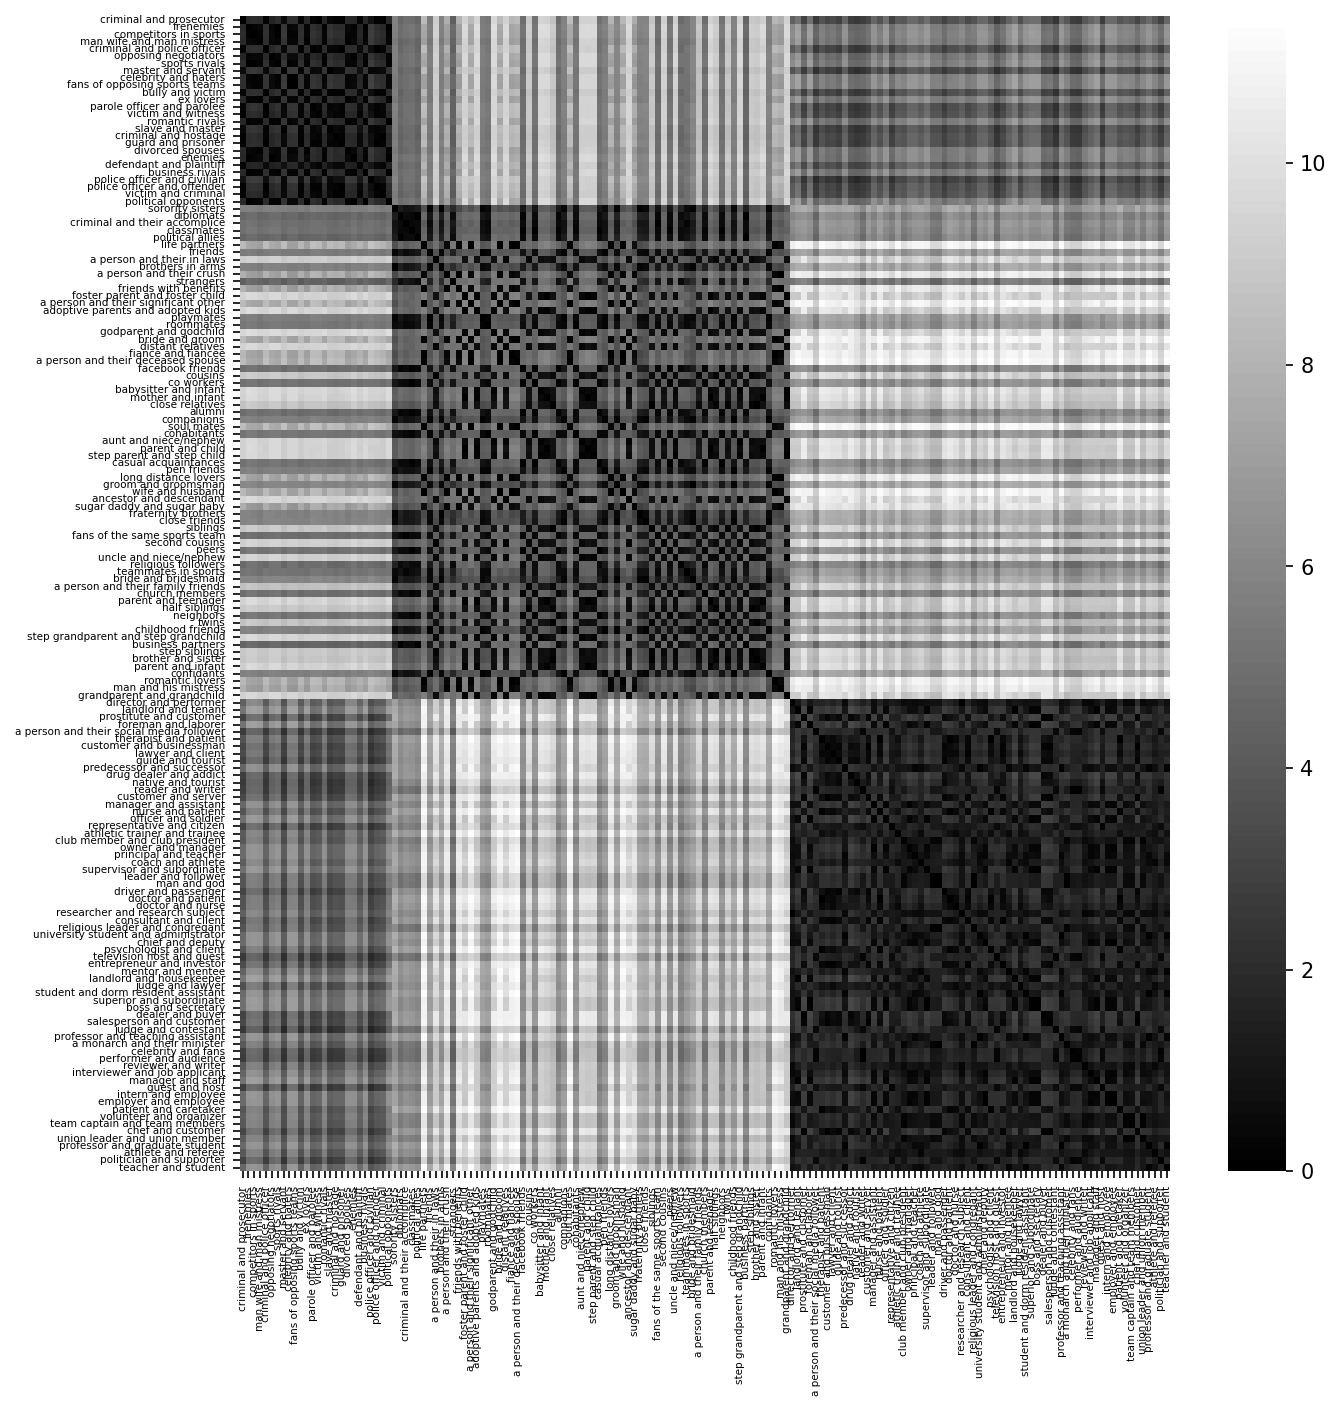

In [16]:
plt.figure(figsize=(10,10),dpi=150)
# plt.title('RDM of Implicit task (59 participants and 159 relationships)')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
dissim_umap_rdm = euclidean_distances(umap_imp_results_159r_all_order[['Dim1','Dim2']])
sns.heatmap(dissim_umap_rdm,xticklabels=rels_c3,yticklabels=rels_c3,
            cmap = cmaps)

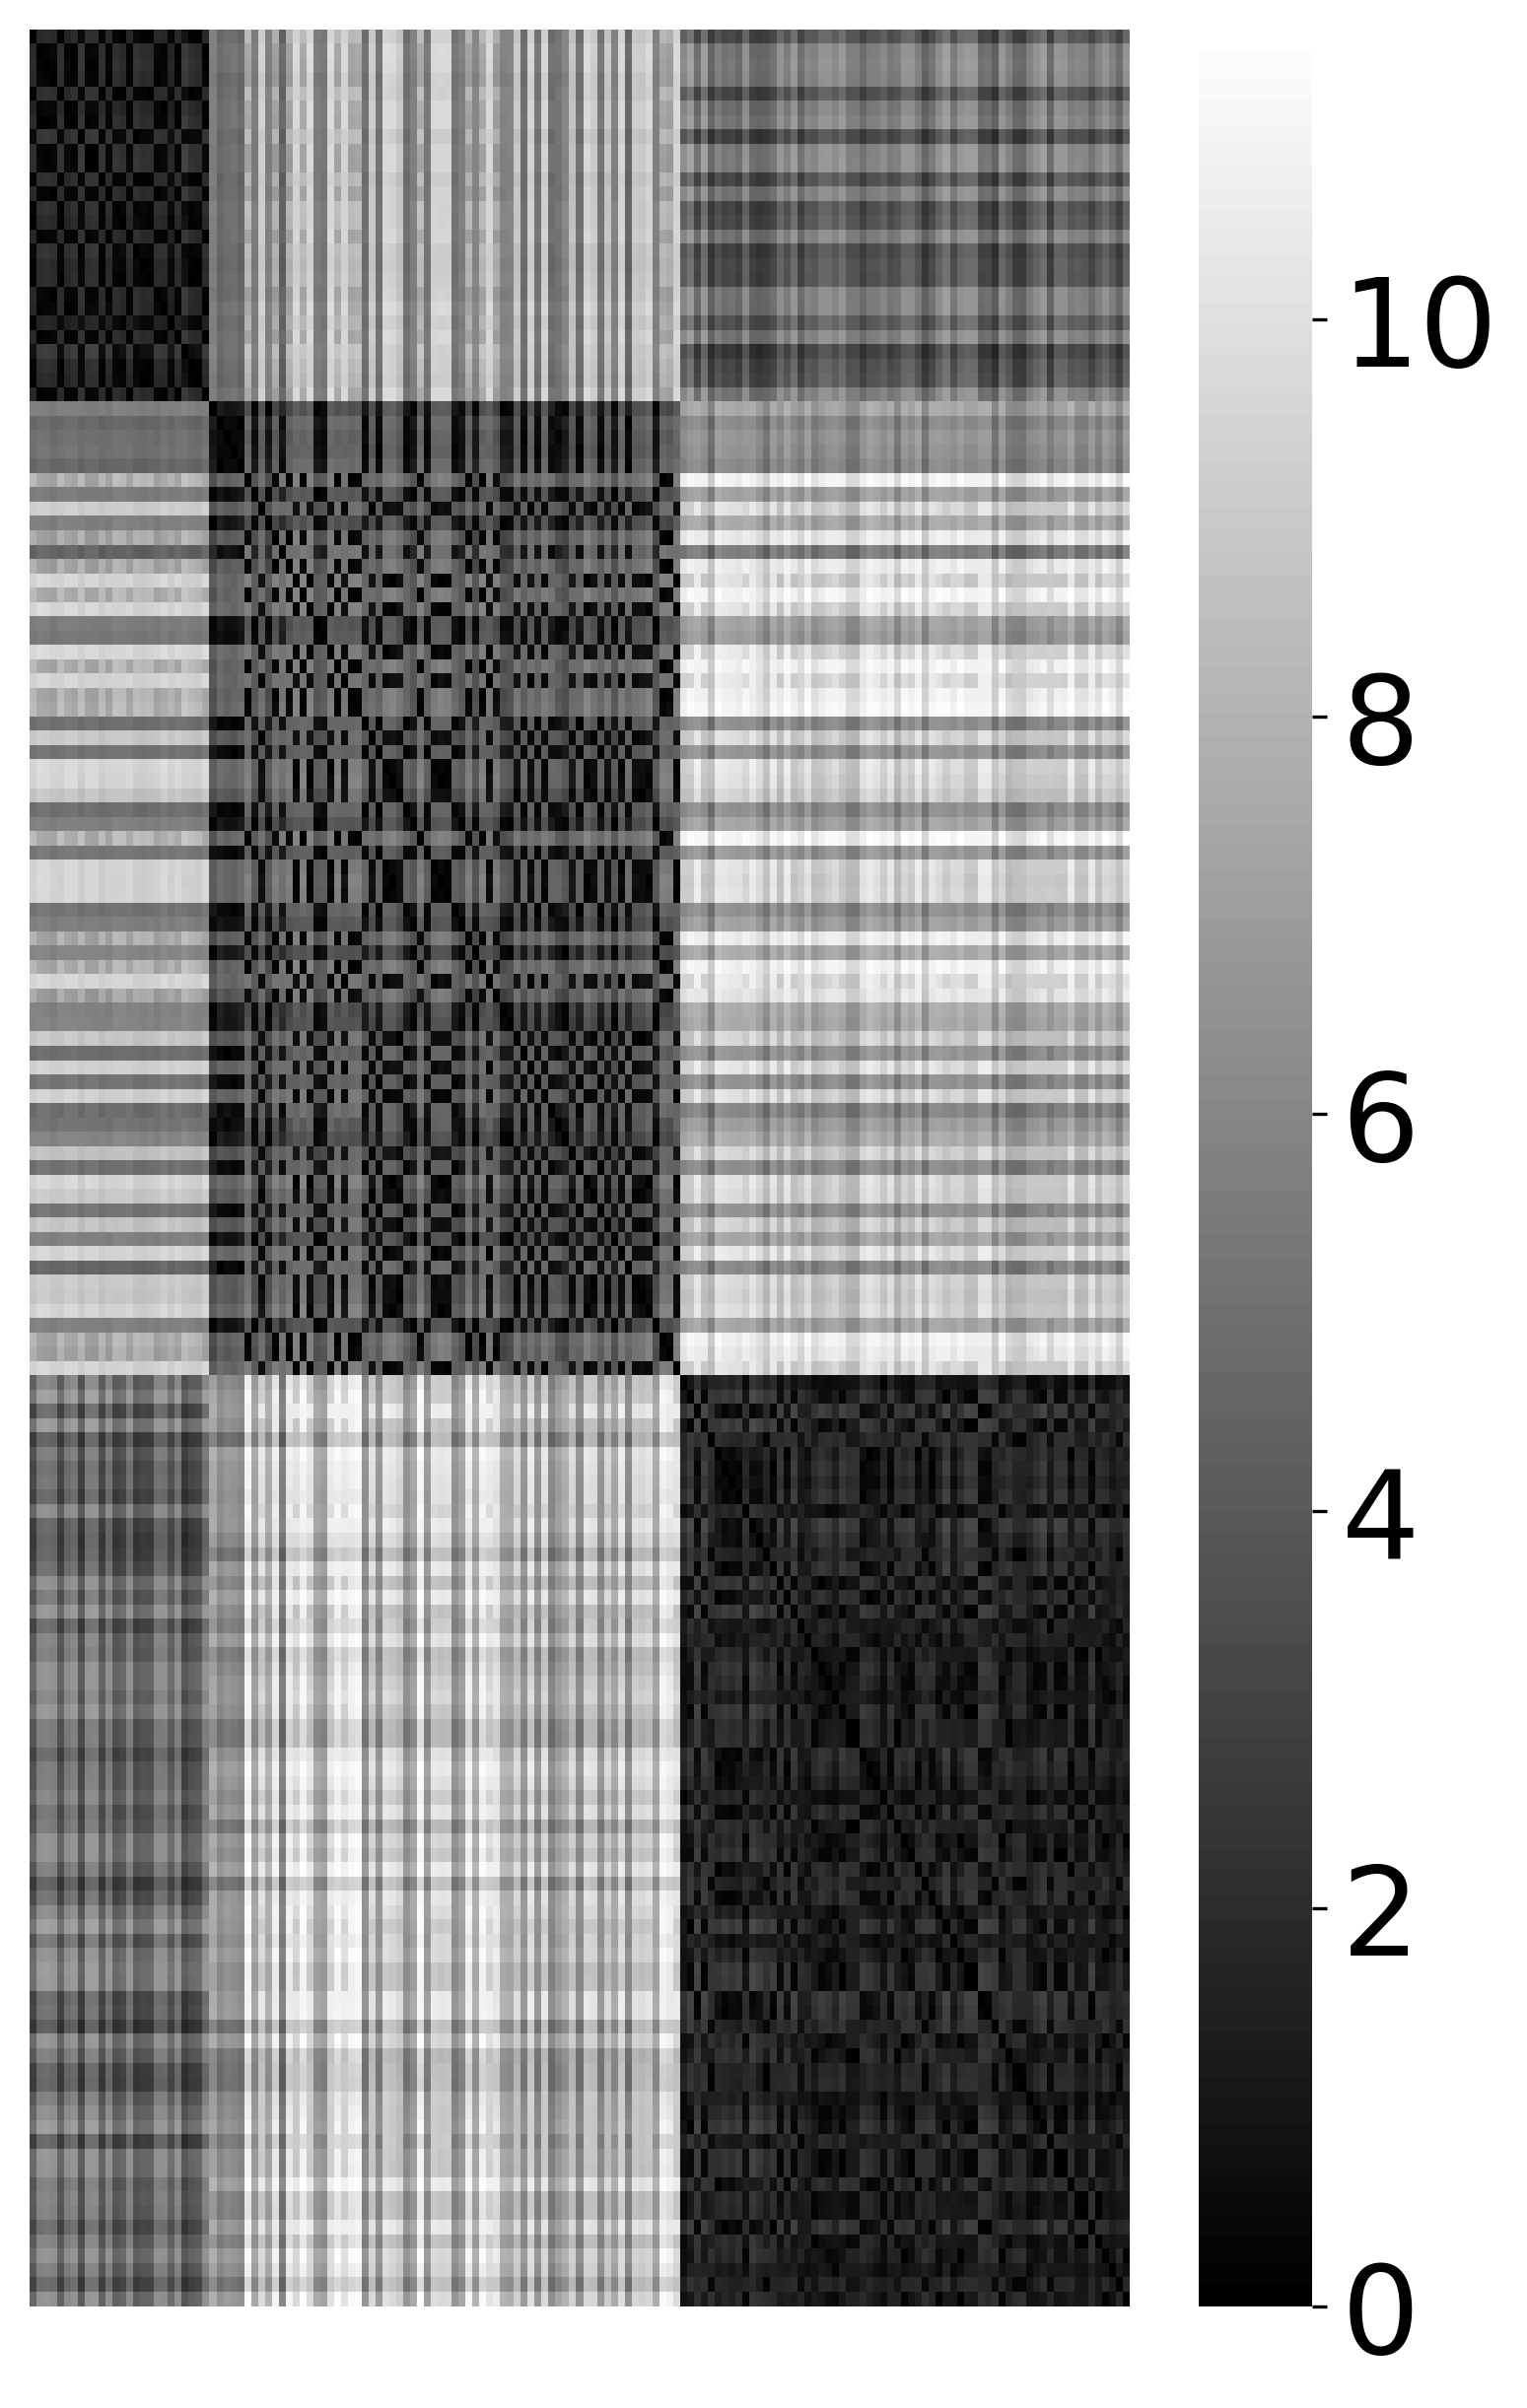

In [17]:
plt.figure(figsize=(6,10),dpi=300)
# plt.title('RDM of Implicit task (59 participants and 159 relationships)')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
dissim_umap_rdm = euclidean_distances(umap_imp_results_159r_all_order[['Dim1','Dim2']])
ax = sns.heatmap(dissim_umap_rdm,xticklabels='',yticklabels='',
            cmap = cmaps,cbar=True)
cbar=ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

# Scatter plot

In [2]:
library(tidyverse)
library(ggplot2)

## Explicit task(M2)

In [5]:
umap_exp_results_159r_all = read.csv('../output_data/group/category/cluster_results/umap_exp_results_159r_all.csv',
                                     row.names=1)

cluster_plot = umap_exp_results_159r_all %>% select(c('Dim1','Dim2','cl_k6'))
cluster_plot = cluster_plot %>% mutate(cluster = 
                        case_when(cl_k6==0~'Power',
                                  cl_k6==1~'Affiliative',
                                  cl_k6==2~'Familial',
                                  cl_k6==3~'Romantic',
                                  cl_k6==4~'Transactional',
                                  cl_k6==5~'Hostile'))

png 
  2

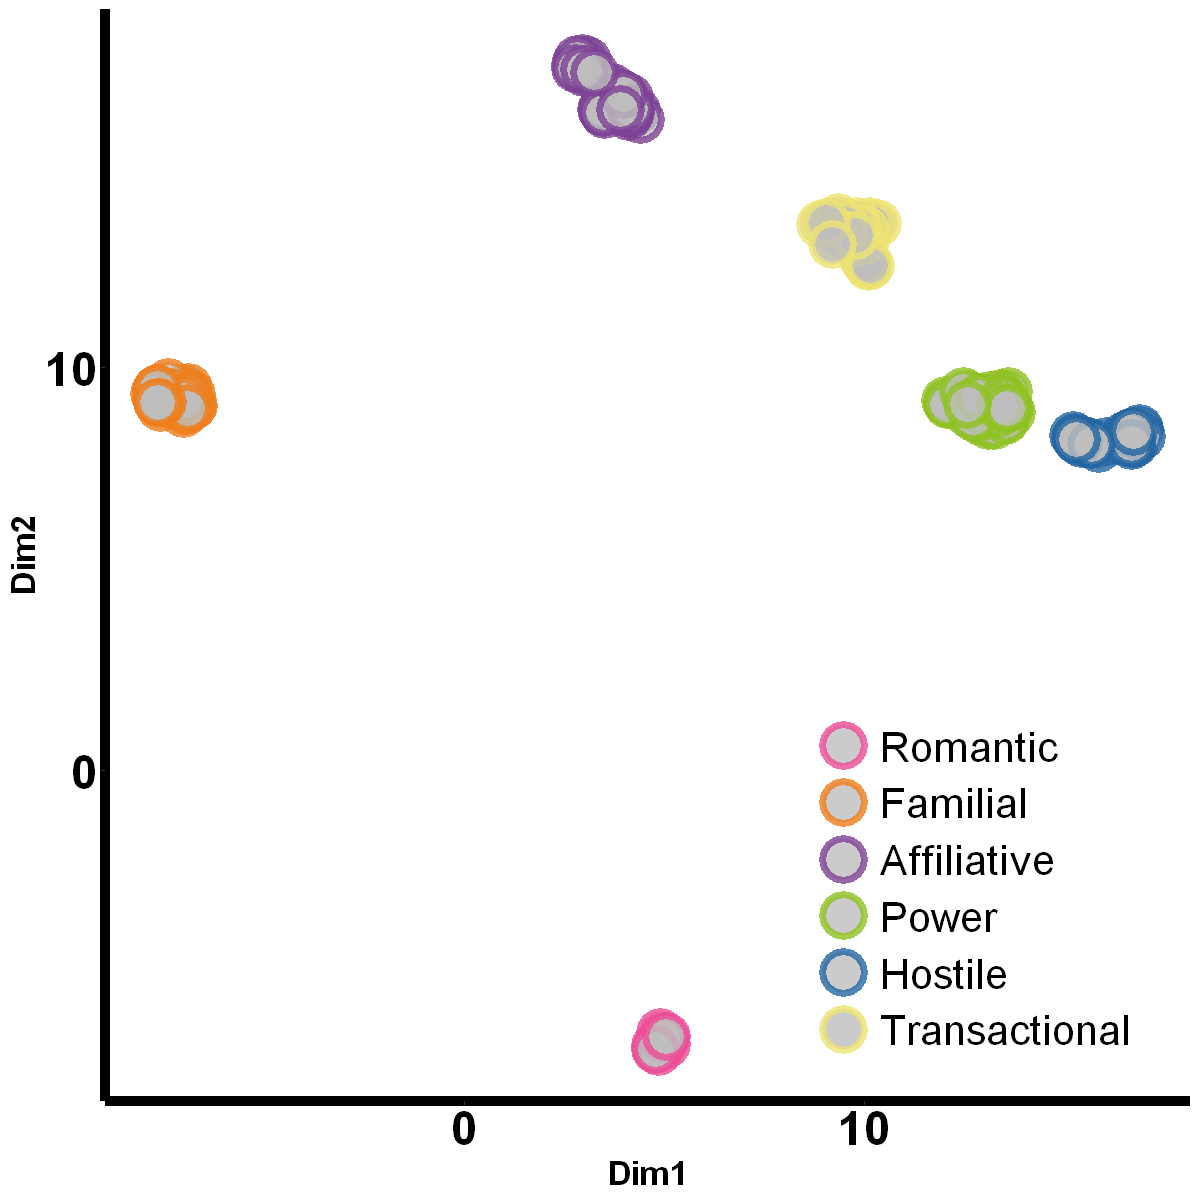

In [10]:
cluster_color=c('Romantic'='#EE4C97','Familial'='#EF7D1A','Affiliative'='#7D4195',
'Power'='#8EC21F','Hostile'='#2466A2','Transactional'='#EEE372')

options(repr.plot.width=10, repr.plot.height=10)
ggplot(data=cluster_plot,aes(x=Dim1,y=Dim2))+
#geom_point(aes(color=cluster),size=8,stroke=1.2,shape=21)+
geom_point(aes(color=cluster),shape=21,fill='grey',
           size=10,stroke=3,alpha=0.8)+
scale_color_manual(values=cluster_color)+
theme_bw()+
theme(panel.grid=element_blank(),
      panel.border=element_blank(),
      axis.text=element_text(size=28,face='bold',color='black'),
      axis.title.x=element_text(size=20,face='bold'),
      axis.title.y=element_text(size=20,face='bold'),
      axis.line=element_line(size=3),
      legend.position = c(0.8, 0.2),
      legend.key.size = unit(1.2,'cm'),
      legend.text = element_text(size = 25),
      legend.title = element_blank())


#############
png("../output_graph/ModelInTasks/Scatter_M2.png", bg="transparent",
    family = 'sans',units='in',width=10,height=10,res=300)
ggplot(data=cluster_plot,aes(x=Dim1,y=Dim2))+
#geom_point(aes(color=cluster),size=8,stroke=1.2,shape=21)+
geom_point(aes(color=cluster),shape=21,fill='grey',
           size=10,stroke=3,alpha=0.8)+
scale_color_manual(values=cluster_color)+
theme_bw()+
theme(panel.grid=element_blank(),
      panel.border=element_blank(),
      axis.text=element_blank(),
      axis.title=element_blank(),
      axis.line=element_line(size=3),
      legend.position = 'none',
      legend.key.size = unit(1.2,'cm'),
      legend.text = element_text(size = 25),
      legend.title = element_blank())
dev.off()

## Implicit task(M1)

In [11]:
umap_imp_results_159r_all = read.csv('../output_data/group/category/cluster_results/umap_imp_results_159r_all.csv',
                                     row.names=1)

cluster_plot = umap_imp_results_159r_all %>% select(c('Dim1','Dim2','cl_k3'))
cluster_plot = cluster_plot %>% mutate(cluster = 
                        case_when(cl_k3==0~'Private',
                                  cl_k3==1~'Public',
                                  cl_k3==2~'Hostile'))

png 
  2

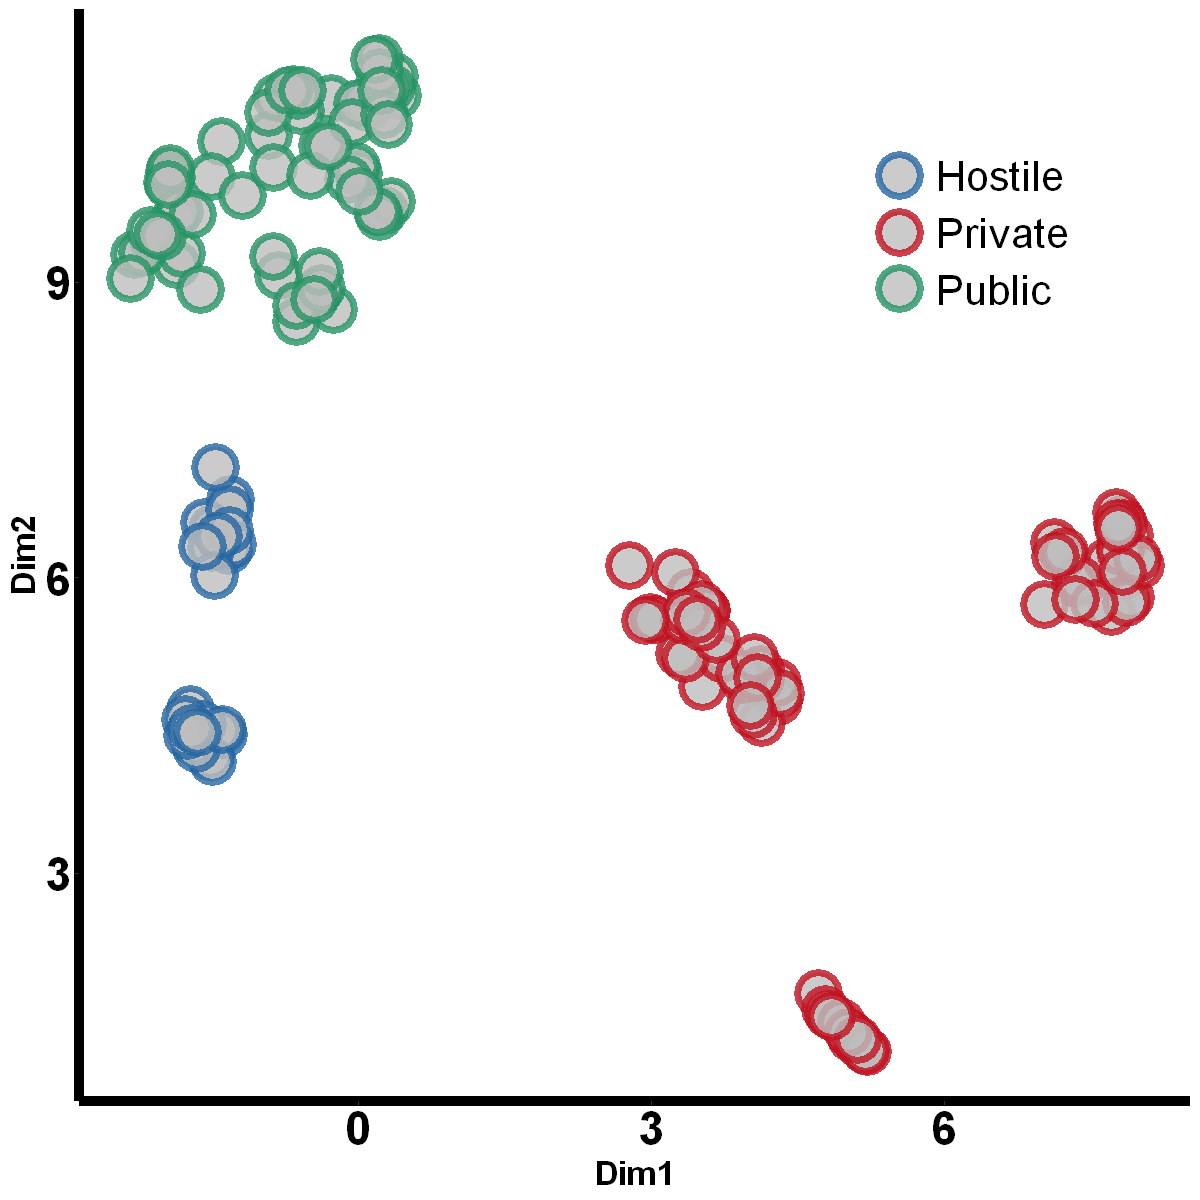

In [12]:
cluster_color=c('Hostile'='#2466A2','Private'='#C11221','Public'='#269464')

options(repr.plot.width=10, repr.plot.height=10)
ggplot(data=cluster_plot,aes(x=Dim1,y=Dim2))+
#geom_point(aes(color=cluster),size=8,stroke=1.2,shape=21)+
geom_point(aes(color=cluster),shape=21,fill='grey',
           size=10,stroke=3,alpha=0.8)+
scale_color_manual(values=cluster_color)+
theme_bw()+
theme(panel.grid=element_blank(),
      panel.border=element_blank(),
      axis.text=element_text(size=28,face='bold',color='black'),
      axis.title.x=element_text(size=20,face='bold'),
      axis.title.y=element_text(size=20,face='bold'),
      axis.line=element_line(size=3),
      legend.position = c(0.8, 0.8),legend.key.size = unit(1.2,'cm'),
      legend.text = element_text(size = 25),
      legend.title = element_blank())


##############
png("../output_graph/ModelInTasks/Scatter_M1.png", bg="transparent",
    family = 'sans',units='in',width=10,height=10,res=300)
ggplot(data=cluster_plot,aes(x=Dim1,y=Dim2))+
#geom_point(aes(color=cluster),size=8,stroke=1.2,shape=21)+
geom_point(aes(color=cluster),shape=21,fill='grey',
           size=10,stroke=3,alpha=0.8)+
scale_color_manual(values=cluster_color)+
theme_bw()+
theme(panel.grid=element_blank(),
      panel.border=element_blank(),
      axis.text=element_blank(),
      axis.title=element_blank(),
      axis.line=element_line(size=3),
      legend.position = 'none',
      legend.key.size = unit(1.2,'cm'),
      legend.text = element_text(size = 25),
      legend.title = element_blank())
dev.off()